## Import all the required packages

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  MinMaxScaler

## Read the Customer Churn Dataset

In [65]:
df=pd.read_csv('Customer_Churn_Dataset_input.csv')

## Distribution of Numerical Dataset

In [66]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

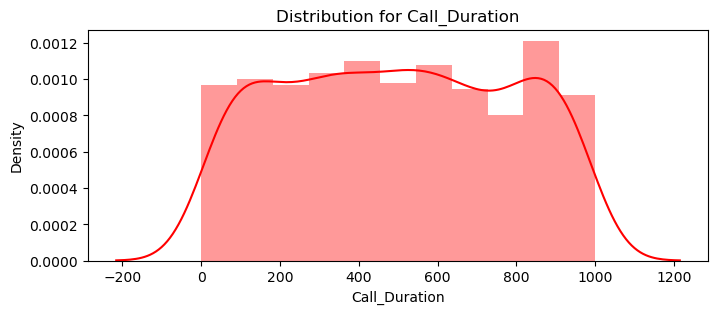

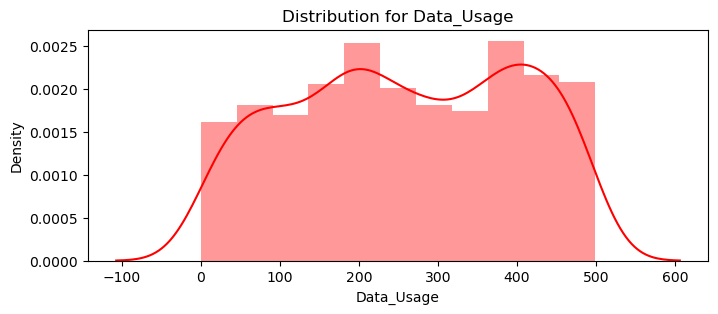

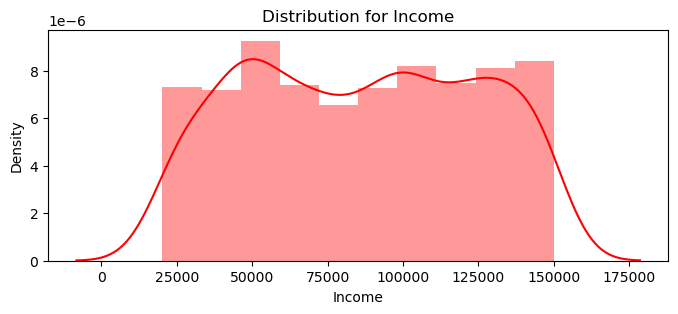

In [67]:
num_cols = ["Call_Duration","Data_Usage","Income"]
for feat in num_cols: distplot(feat, df)

## Apply Standard Scalar to dataset

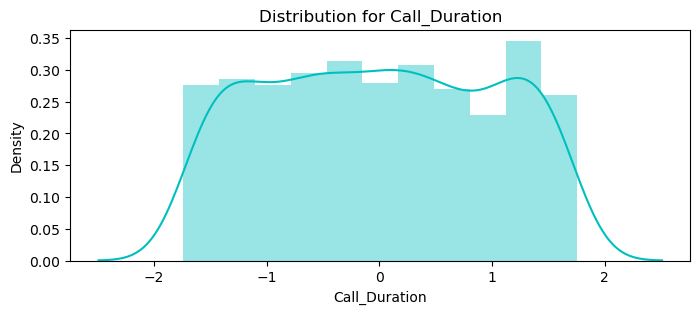

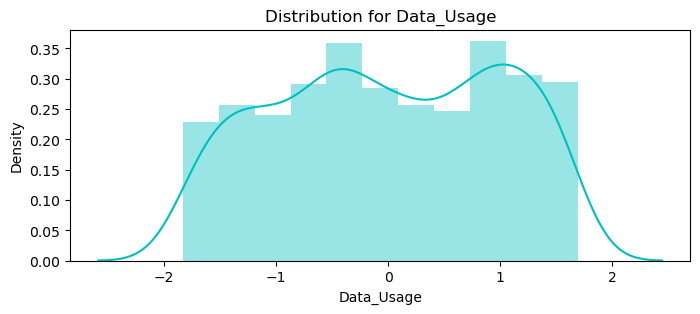

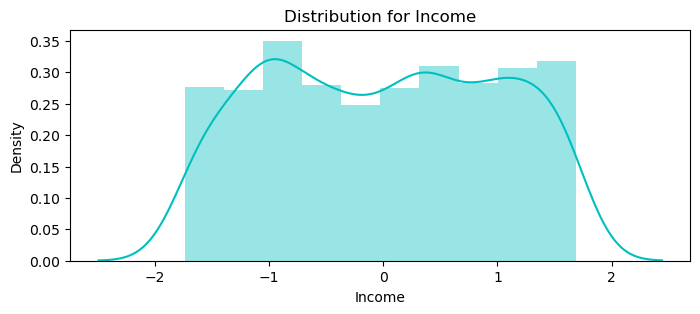

In [68]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

df_remaining = df.drop(columns=num_cols)
newdf = pd.concat([df_remaining,df_std],axis=1)


In [69]:
newdf.to_csv('StandardScaledData.csv',index=False)

## Trying Min Max Scalar to Dataset

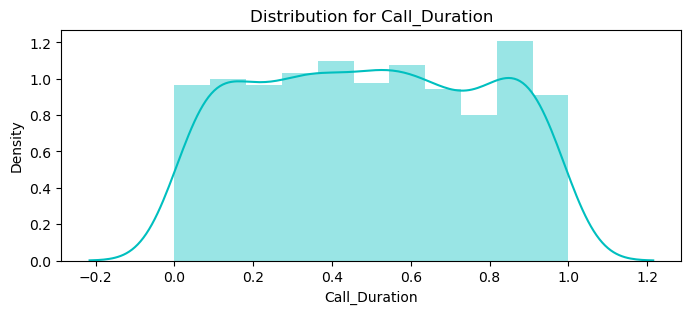

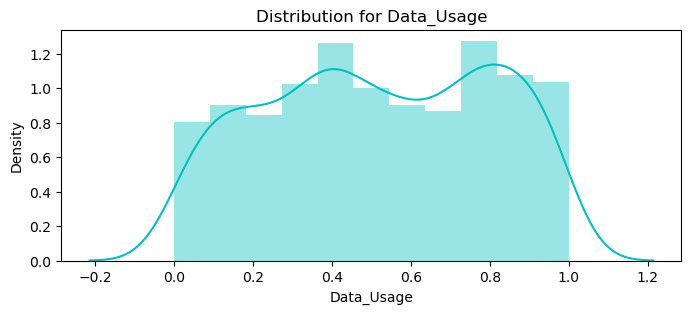

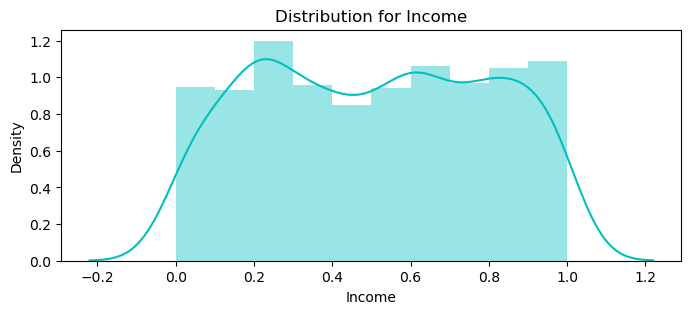

In [70]:
#features_mms = ["Account_Length","Call_Duration","Data_Usage","Income"]
features_mms = ["Call_Duration","Data_Usage","Income"]
df_mms = pd.DataFrame(MinMaxScaler().fit_transform(df[features_mms].astype('float64')),
                       columns=features_mms)

for feat in features_mms: distplot(feat, df_mms, color='c')

df_remaining = df.drop(columns=features_mms)
newdfmms = pd.concat([df_remaining,df_mms],axis=1)

In [71]:
newdfmms

,CustomerID,Age,Gender,Account_Length,Contract_Type,Churn,Call_Duration,Data_Usage,Income
0,1,56,1,13,2,1,0.752753,0.771543,0.284654
1,2,69,1,22,2,0,0.834835,0.186373,0.065841
2,3,46,0,19,1,1,0.979980,0.442886,0.183428
3,4,32,1,34,0,0,0.403403,0.406814,0.535789
4,5,60,1,14,0,0,0.628629,0.274549,0.083591
...,...,...,...,...,...,...,...,...,...
995,996,18,1,16,2,0,0.058058,0.633267,0.066504
996,997,35,0,34,0,1,0.824825,0.761523,0.282464
997,998,49,0,2,0,0,0.039039,0.288577,0.848702
998,999,64,1,35,0,1,0.236236,0.653307,0.347734


In [72]:
newdfmms.to_csv('MinMaxScaledData.csv',index=False)